In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
data=pd.read_csv('sales.csv', index_col=[0], parse_dates=True, squeeze=True)

In [17]:
data

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0
2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0
2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0
2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...
2022-01-08,NaN,NaN,NaN,NaN
2022-01-09,NaN,NaN,NaN,NaN
2022-01-10,NaN,NaN,NaN,NaN


In [19]:
data.drop(['Revenue','Sales_quantity','The_average_annual_payroll_of_the_region'],axis=1,inplace=True)

In [20]:
data.head()


,Average_cost
Period,
2015-01-01,1257.763541
2015-01-02,1358.507000
2015-01-03,1384.697024
2015-01-04,1235.606705
2015-01-05,1626.621765


In [21]:
data

,Average_cost
Period,
2015-01-01,1257.763541
2015-01-02,1358.507000
2015-01-03,1384.697024
2015-01-04,1235.606705
2015-01-05,1626.621765
...,...
2022-01-08,NaN
2022-01-09,NaN
2022-01-10,NaN


In [22]:
data.dropna(inplace=True)

In [23]:
data

,Average_cost
Period,
2015-01-01,1257.763541
2015-01-02,1358.507000
2015-01-03,1384.697024
2015-01-04,1235.606705
2015-01-05,1626.621765
...,...
2019-01-12,1543.420464
2020-01-01,2070.640850
2020-01-02,1711.057181


<AxesSubplot:xlabel='Period'>

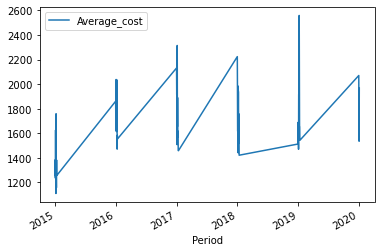

In [24]:
data.plot()

In [25]:
data.describe()

,Average_cost
count,64.000000
mean,1695.061159
std,296.844793
min,1110.576805
25%,1499.142841
50%,1654.399798
75%,1916.401096
max,2559.328184


In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

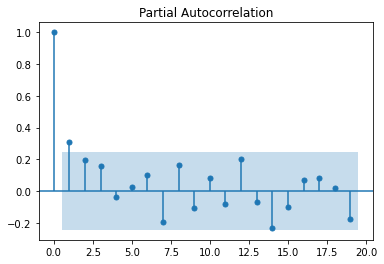

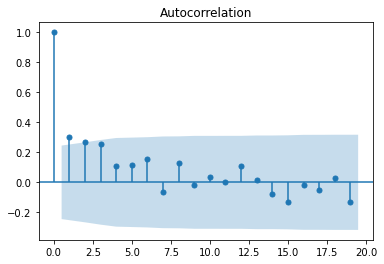

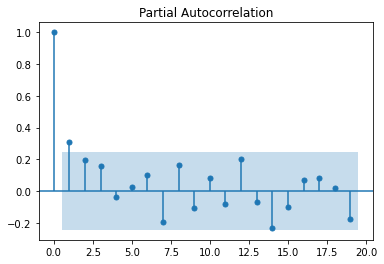

In [28]:
plot_acf(data)
plot_pacf(data)

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:
data_train=data[0:53]
data_test=data[53:64]


In [33]:
time_model=ARIMA(data_train,order=[1,1,1])
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\sarbo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sarbo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [34]:
time_model.fit()

C:\Users\sarbo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [35]:
time_model.fit().aic

C:\Users\sarbo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


733.5105485116818

In [36]:
forecast=time_model.fit().forecast(steps=11)[0]

C:\Users\sarbo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
np.sqrt(mean_squared_error(data_test,forecast))

349.1477212072619